# Project 4: Train a Smartcab to Drive
#### Reinforcement Learning
#### Machine Learning Nanodegree (Udacity)
Project submission by Edward Minnett (ed@methodic.io).

August 3rd 2016. (Revision 2)

-------

In [1]:
import support as sp
from IPython.display import display
%matplotlib inline

## Implement a Basic Driving Agent

To begin, your only task is to get the smartcab to move around in the environment. At this point, you will not be concerned with any sort of optimal driving policy. Note that the driving agent is given the following information at each intersection:

- The next waypoint location relative to its current location and heading.
- The state of the traffic light at the intersection and the presence of oncoming vehicles from other directions.
- The current time left from the allotted deadline.

To complete this task, simply have your driving agent choose a random action from the set of possible actions (None, 'forward', 'left', 'right') at each intersection, disregarding the input information above. Set the simulation deadline enforcement, enforce_deadline to False and observe how it performs.

#### QUESTION: Observe what you see with the agent's behaviour as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

During the many iterations that I watched, the number of steps taken before reaching the destination varied dramatically. A few times it reached the destination very quickly, but for most of the iterations, the agent moved around very inefficiently. This isn't surprising given the random choice of action taken. A more interesting observation is that the agent spends more time stuck at an intersection than it does moving around. At face value, it feels as though this can't be right as 3 out of four actions result in movement, but when those actions are combined with the state of the traffic lights and the placement of other agents within the environment, more actions than not result in no movement.

The following statistics and chart illustrate the results of simmulating 100 trials using the Random Acion policy.

The destination was reached in 14 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,-0.17,7.131244,-19.5,-4.5,-1.50,3.25,21.0
negative_reward,100,-11.59,4.859844,-27.5,-14.5,-11.75,-9.50,-0.5
trial_length,100,28.17,10.259319,4.0,21.0,26.00,36.00,56.0


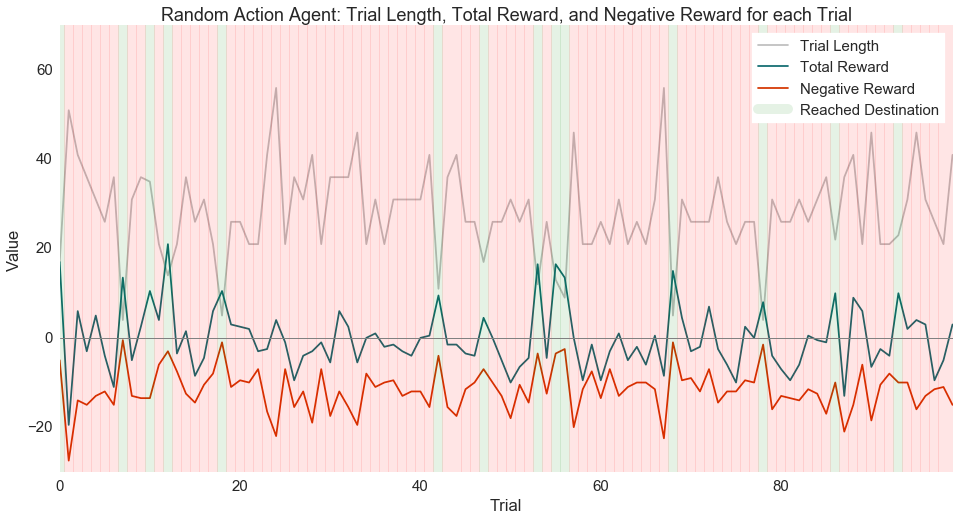

In [2]:
sp.display_random_agent_stats()

As you would expectgiven that the policy was a random selection from the 4 possible actions without taking account for any information about the agent's environement or state, the results are quite poor. The agent incurs a significant negative penalty in almost all of the trials and only happens to reach the destination in 14 out of 100 trials.

## Inform the Driving Agent

Now that your driving agent is capable of moving around in the environment, your next task is to identify a set of states that are appropriate for modelling the smartcab and environment. The main source of state variables are the current inputs at the intersection, but not all may require representation. You may choose to explicitly define states, or use some combination of inputs as an implicit state. At each time step, process the inputs and update the agent's current state using the self.state variable. Continue with the simulation deadline enforcement enforce_deadline being set to False, and observe how your driving agent now reports the change in state as the simulation progresses.

#### QUESTION: What states have you identified that are appropriate for modelling the smartcab and environment? Why do you believe each of these states to be appropriate for this problem?

My initial implementation of the informed driving agent was very naive. I wanted to see how the agent performed if it simply performed the action suggested by the route planner. This would be the equivalent of letting your sat-nav drive your car without any input from the environment. A bad idea certainly, but this naive agent will offer a baseline performance that less naive strategies can be compared against. 100 iterations using the Naive policy resulted in a sample of trial statistics. This results for this sample are as follows:

The destination was reached in 100 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,15.46,4.822967,5,12.00,15,18.25,29
negative_reward,100,-6.84,4.602854,-19,-9.25,-6,-3.00,0
trial_length,100,12.99,5.591290,2,9.00,12,17.00,29


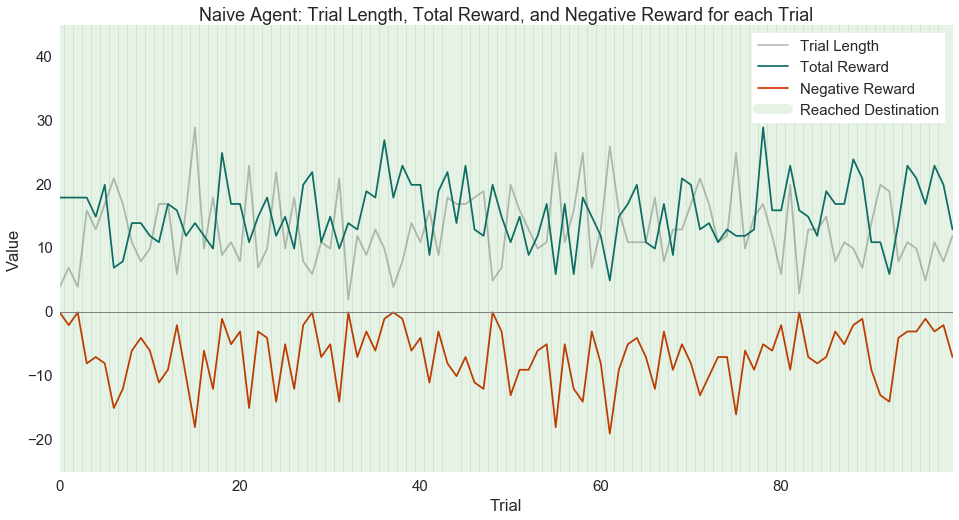

In [3]:
sp.display_naive_agent_stats()

Even though the only information this agent considered was the direction suggested by the route planner, it did successfully reach the destination in all 100 trials. For the most part, the trial length (number of steps taken in the trial) is significantly lower than the Random Action Agent, but the agent did incur significant negative rewards for the large majority of the trials. Given that the number of steps taken were not a consideration, meaning that every trial received the 12 point reward for reaching the destination, the naive strategy performed quite poorly. 

A natural improvement on the Naive Agent is to combine the naive policy with logic that determines whether the desired agent action is legal within the context of the environment inputs and the 'rules of the road'. This Informed Driver policy results in a much better performing agent. A simulation with 100 trials using this policy resulted in the following statistics:

The destination was reached in 100 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,22.12,3.479464,18,20,22,24,32
negative_reward,100,0.00,0.000000,0,0,0,0,0
trial_length,100,12.50,5.448566,4,8,12,16,28


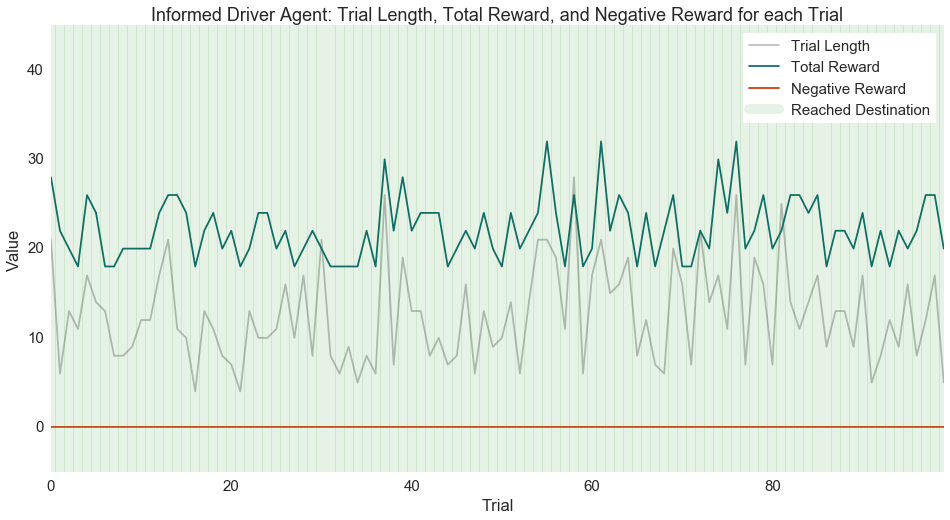

In [4]:
sp.display_informed_driver_agent_stats()

Given the Informed Driver agent is given all of the infomation it needs to navigate the environment, it is not a suprise that the total reward for each trial is so how, the trial length is so low, and that every trial resulted in the agent reaching the destination without incurring a negative penalty.

This analysis requires the knowledge of the outcomes for each trial, but this knowledge purely acts as meta information to analys the agent performance and isn't used to influence the behaviour of the agent.

The policy for the Informed Driver Agent only requires two pieces of information about its state.

1. **What direction should I travel to receive the maximum reward?** This is necessary to know where to travel to move closer to the destination.
2. **Is the ideal direction of travel a legal move?** This is necessary to avoid incurring a negative reward.

The first state is given by the output of the route planner and the second is determined by applying the 'rules of the road' to the desired direction of travel. This logic was hard coded within the agent and encoded information such as 'you can not move when the traffic light is red unless it is to turn right and if there is a car to the left, it is not travelling forward'. (**NB**: The 'rules of the road' for this project are defined in lines 177 through 189 of environment.py)

The simplicity of this state space results in 6 possible states (2 each representing whether the move is legal for each of the 3 possible movemenets).

If the ideal direction of travel would not result in a legal move, the agent takes no action (an action of 'None').

This policy ensures the maximum reward without incurring any negative rewards.

Even though including the delay value in the agent state could allow for the policy to be tailored at various stages of the trial, doing so is unnecessary if the existing policy will reach the destination in time and maximise the reward. The chart of the Informed Driver simulation clearly shows that the agent reaches the destination without taking the deadline into account. For this reason, the deadline value does not impact the agent state or policy for the Informed Driver Agent.

That said, the delay value will becaome very important when implementing the Q-Learning agent as this value will help inform the probability of exploration allowing the agent to eplore more at the begining of a trial and explore less at the end.

#### OPTIONAL: How many states in total exist for the smartcab in this environment? Does this number seem reasonable given that the goal of Q-Learning is to learn and make informed decisions about each state? Why or why not?

In [5]:
num_traffic_light_states = len(['red', 'green'])
num_oncoming_traffic_states = len(['forward', 'left', 'right', None])
num_left_traffic_states = len(['forward', 'left', 'right', None])
num_right_traffic_states = len(['forward', 'left', 'right', None])
num_desired_direction_of_travel_states = len(['forward', 'left', 'right'])

total_size_of_the_state_space = (num_traffic_light_states * 
                                 num_oncoming_traffic_states * 
                                 num_left_traffic_states *
                                 num_right_traffic_states *
                                 num_desired_direction_of_travel_states)
print "Total state space size: {}".format(total_size_of_the_state_space)

Total state space size: 384


Given that there are 4 possible agent actions, this state space will result in Q being represented by a matrix with 4 columns and 384 rows. This is well within the realm of reasonability for Q-Learning as an algorithm especially Q-Learning only requires looking up and setting values within the matrix. I'm sure Q-Learning could support much, much, larger state / action spaces especially given the posssibilities offered by improving the performance of searching the matrix. For example if th state space was signficantly large, Q could be broken down into multiple matrices or tables divided by one or more aspects of the state space.

It is worth noting that in the context of this project where there are only three other agents within the environment, the Q matrix is likely to be quite sparse. The probability that there are agents occupying all three opposing directions of traffic at an intersection is very low and this would have to happen many times within a simulation for the agent to encounter all of the permutations within the state space. Each simulation would have to include far more trials than the default 100 or many more other agents to even come close to filling the entire Q matrix for this project. A sparse Q matrix should suffice to reach the optimal policy given that a high performing agent only needs to learn the optiaml actions for the highest probability states and 100 trials should be enough for the sample probability of states to reflect the population probabilities.

## Implement a Q-Learning Driving Agent

With your driving agent being capable of interpreting the input information and having a mapping of environmental states, your next task is to implement the Q-Learning algorithm for your driving agent to choose the best action at each time step, based on the Q-values for the current state and action. Each action taken by the smartcab will produce a reward which depends on the state of the environment. The Q-Learning driving agent will need to consider these rewards when updating the Q-values. Once implemented, set the simulation deadline enforcement enforce_deadline to True. Run the simulation and observe how the smartcab moves about the environment in each trial.

#### QUESTION: What changes do you notice in the agent's behaviour when compared to the basic driving agent when random actions were always taken? Why is this behaviour occurring?


My initial implementation of the Q-Learning Agent used the small (6 value) state space and hard coded logic to ensure the agent would experinece enough of the state space quickly enough to debug the implementation. Once I was convinced that the implementation was significantly robust, I then increased the state space first to 24 states and then to the full 384 by slowly taking information encoded within the 'rules of the road'. The agent that attempts to learn the Q values for the full state space has no prior knowledge of what constitutes a 'legal' movement. I also refactored the hard coded exploration logic to use a 'probability of exploration' function dependent upon the ε exploration parameter. The 'probability of exploration' function is as follows:

In [6]:
def exploration_probability(epsilon, deadline):
    # N(s,a) is the number of times the state-action pair has been encountered.
    n = max(1, N(s,a)) 
    eagerness_to_explore = epsilon * deadline / n
    # The eagerness_to_explore value can be larger than 1 
    # when n is small and the deadline is large. This will 
    # result in an exploration_probability of 1.
    return min(1, eagerness_to_explore)

If N(s,a) is small and / or the deadline value is large, then the probablity of exploration will be 1 or nearly 1. This ensures that the agent is more likely to explore at the begining of a trial, but less so at the end, and also if the state-action pair has not been experineced very often, a situation where Q(s,a) may be unstable. This function also ensures that the probability of exploartion decays when a state-action pair has been encountered many times and is likely to have a stable Q value.

A sample of 100 trials with α, γ, and ε set to 0.5 (the arbitrary default values I used while developing the implementation) resulted in the following statistics:

This agent received a fitness score of 40.6330758529.
The destination was reached in 86 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,21.860,7.335427,-0.5,18.0,21.75,25.125,46
negative_reward,100,-2.295,2.911224,-16.0,-3.5,-1.50,0.000,0
trial_length,100,16.960,8.079054,4.0,11.0,16.00,24.000,36


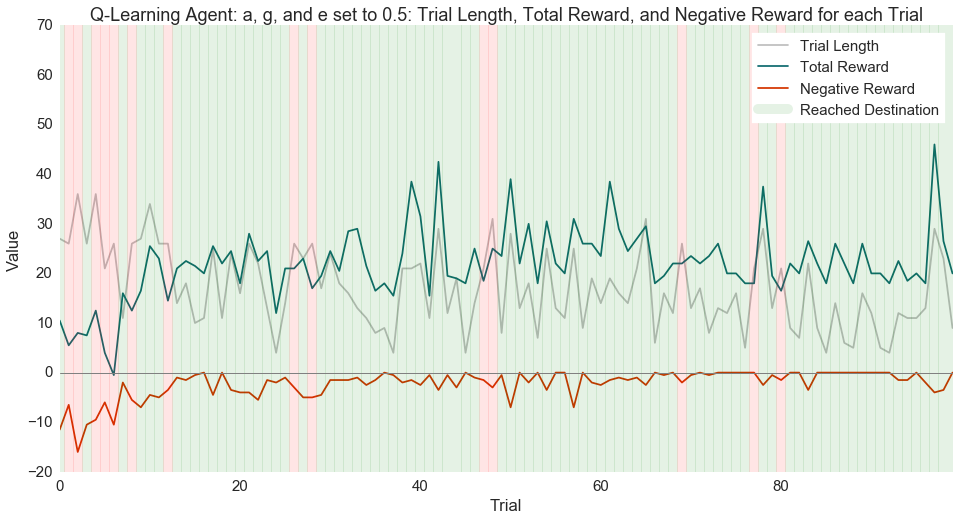

In [7]:
sp.display_stats_for_the_q_learning_agent_with_params(0.5)

The observed behaviour of the Q-Learning Agent is that in the first set of trials, the agent behaves randomly with more trials than not failing to reach the destination, but after 15 trials or so this likelyhood flips. After the 15th trial, the agent behaves a lot more consistently with only 7 trials out of 85 where the agent fails to reach the destination and incurring fewer negative rewards along the way. It is by the 15th trial that the agent has presumably encountered the mnost common states enough times to develop reasonably stable Q values for those state-action pairs. The large ε value means the agent continues to explore and make mistakes pretty much all of the way through the 100 trials. I don't believe this agent is defined by the optimal parameter values, but we will come to that next.

## Improve the Q-Learning Driving Agent

our final task for this project is to enhance your driving agent so that, after sufficient training, the smartcab is able to reach the destination within the allotted time safely and efficiently. Parameters in the Q-Learning algorithm, such as the learning rate (alpha), the discount factor (gamma) and the exploration rate (epsilon) all contribute to the driving agent’s ability to learn the best action for each state. To improve on the success of your smartcab:

Set the number of trials, n_trials, in the simulation to 100.
Run the simulation with the deadline enforcement enforce_deadline set to True (you will need to reduce the update delay update_delay and set the display to False).
Observe the driving agent’s learning and smartcab’s success rate, particularly during the later trials.
Adjust one or several of the above parameters and iterate this process.
This task is complete once you have arrived at what you determine is the best combination of parameters required for your driving agent to learn successfully.

#### QUESTION: Report the different values for the parameters tuned in your basic implementation of Q-Learning. For which set of parameters does the agent perform best? How well does the final driving agent perform?

In order to find optimal (or at least semi optimal) values for α, γ, and ε, I wrapped the execution of an agent simulation with 100 trials in logic to support a grid search for the parameters. The grid search generated simulation statitics for the 512 combinations of α, γ, and ε taking using the 8 values 0.01, 0.03, 0.05, 0.07, 0.1, 0.3, 0.5, 0.7. This search was far from exhaustive and a search with more possible values may end up with a different optimal result. Executing the 512 simulations took nearly two hours and increasing the search space would have increased the run time dramatically. The metric used to dtermine the optimal parameters was derived as follows. 

The rough defninition of a successful simulation is quite easy to define; the simulation that learns Q(s,a) quickly enough while minimising the negative reward incurred is successful. Quantifying this into a score that can be minimised (as a penalty) or maximised (as a score) is substantially more difficult and some what subjective. I began by defining a penalty score that was the product of the average of the the last 5 trials where a negative reward was incurred and the average of the last two trials where the agent failed to reach the destination. This metric was found to be flawed as 32 simulations resulted in the agent reaching the destination in all 100 trials. Since the penalty score was a product, all 32 simulations received a penalty score of 0 so this clearly sould not work. I then settled on the sum of the two previously described values instead of a product and decreased the number of trials avergaed when examining negative rewards from 5 to 2. This effectively penalised simulations more when they incurred negative rewards toward the end of the simulation. Unfortunately, because the act of exploration in Q-Learning is stochastic and each set of paramters was simulated once, this metric could rule out potentially optimal parameters simply based on 'bad luck'. Even though this metric is still flawed, I couldn't think of a better way of objectively determining the optimal parameters from the grid search. This lead me to seek advice from the first Udacity reviewer who suggested coming up with a metric that included all four sets of statistics collected for each simulation.

I was also disatisfied with my decision to determine fitness using a penalty value where the optimal simulation had the lowest score. This fundamentally feels less intuitive than a fitness score where the simulation with the largest score is the fittest. After some additional experimentation I settled on the following calculation for the revised fitness score:

For each of the four simulation trial statistics (total reward, negative reward, trial length, and destination reached) a raw score is calculated for each simulation. The raw scores are then scaled across a;; of the grid search results so that the simulation that scored the worst for the given metric receives a 0 and the best receives 100. The four scaled scores are then averaged to give a single score with a potential minimum of 0 and potential maximu  of 100 although these potential final fitness scores are very unlikely.

The four raw scores are calculated as follows:

- **Raw Total Reward Score**: The average total reward for the last 20 trials. Larger is better.
- **Raw Negative Reward Score**: The average of the last two trial numbers where a negative reward was received multiplied by the total negative reward received across all trials. Larger is better.
- **Raw Trial Length Score**: The average trial length for the last 20 trials. Smaller is better.
- **Raw Destination Reached Score**: The average of the last two trial numbers where the destination was not reached OR the only trial number where the the destination was not reached OR 0 if the destination was always reached. Smaller is better. 

The gridsearch results can be visualised using the following 8 heatmaps (one for each value of alpha searched):

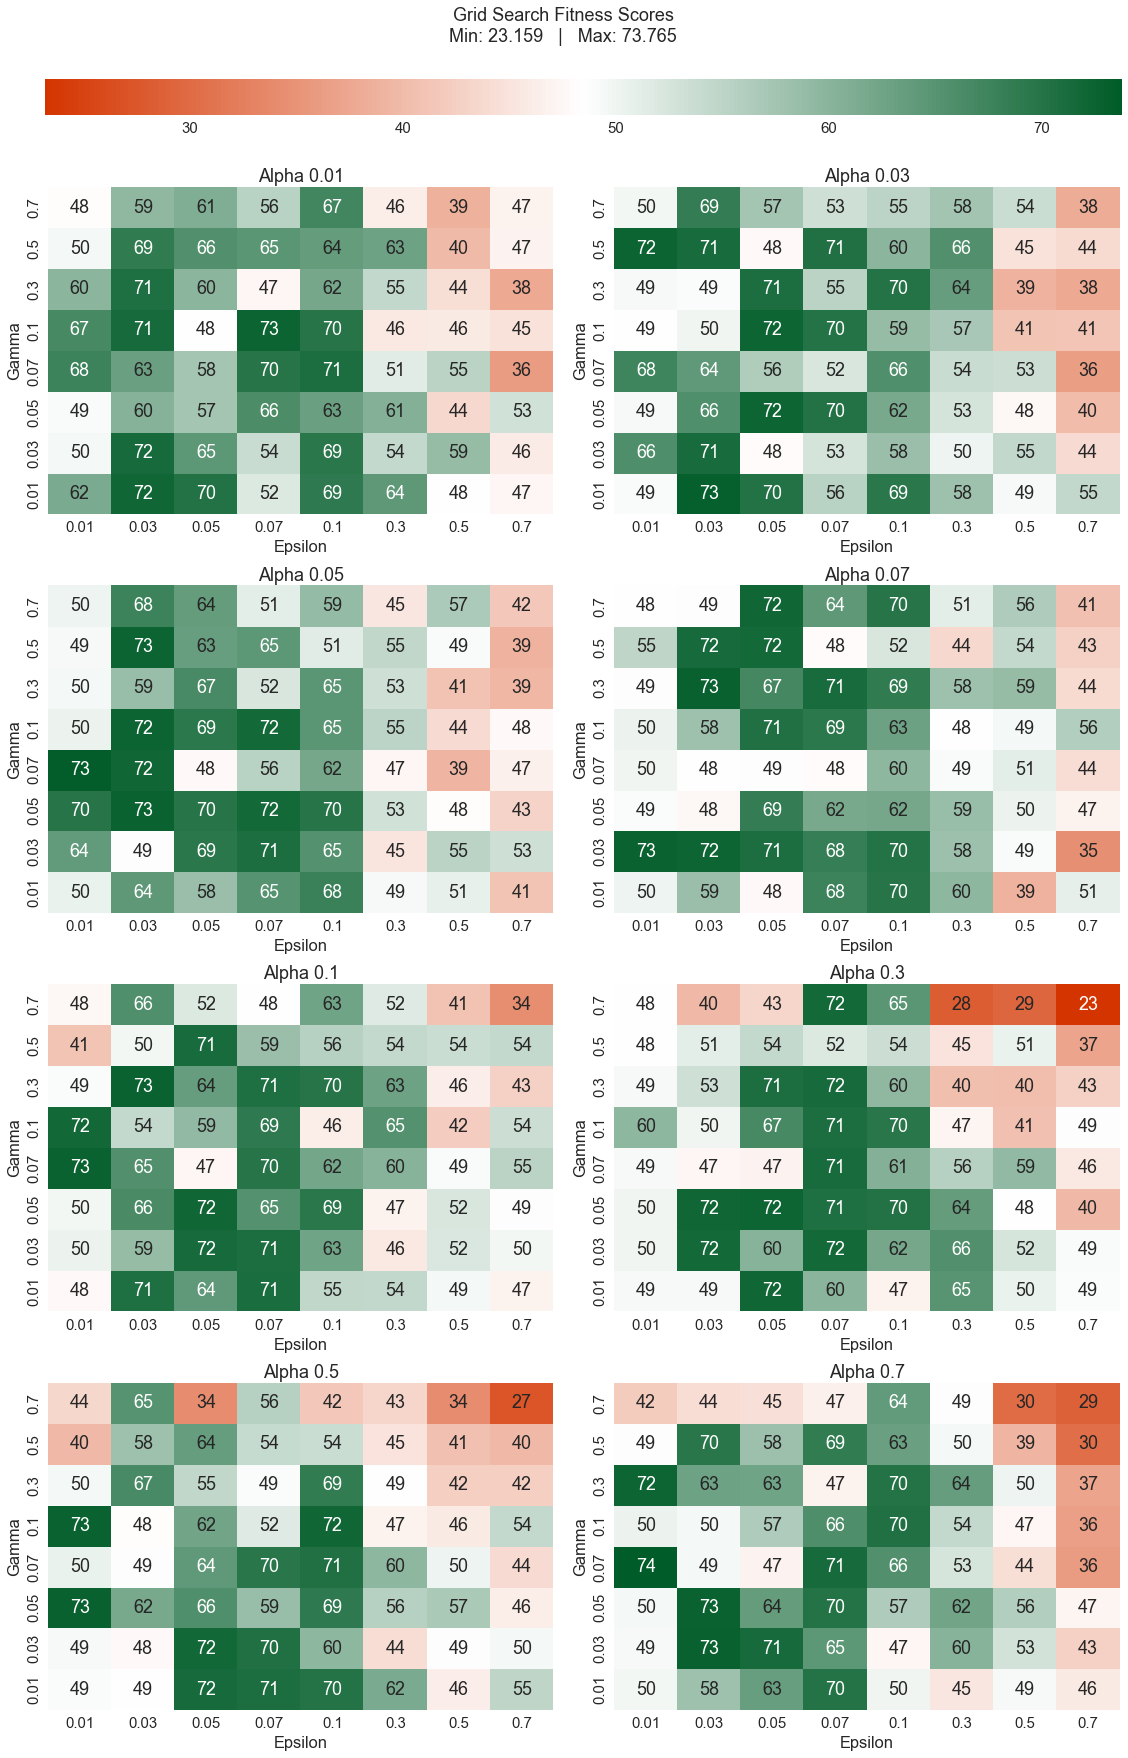

In [13]:
sp.display_grid_search_score_heatmaps()

The heatmaps result in an interesting observation. The fitness scores for simulations where ε is between 0.03 and 0.1 are, on average, higher than when ε is larger or smaller. Fitness scores have the greatest variance when ε is 0.01 which includes the maximum value. When ε is larger than 0.1, the fitness scores tend to decrease dramtically with a very distinct minimum when α, γ, and ε are 0.3, 0.7, and 0.7 respectively. Unlike the pattern present for different values of ε, there is at least one set of parameters for every value of α and γ where the simulation received a fitness within 2 points of the maximum.

This grid search resulted in the following optimal parameters:

The optimal parameters are: {'alpha': 0.7, 'gamma': 0.07, 'epsilon': 0.01}
This agent received a fitness score of 73.7654864371.
The destination was reached in 100 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,21.38,4.062715,10,18,20,24,33.5
negative_reward,100,-0.28,1.094799,-10,0,0,0,0.0
trial_length,100,12.49,5.751583,2,8,12,16,26.0


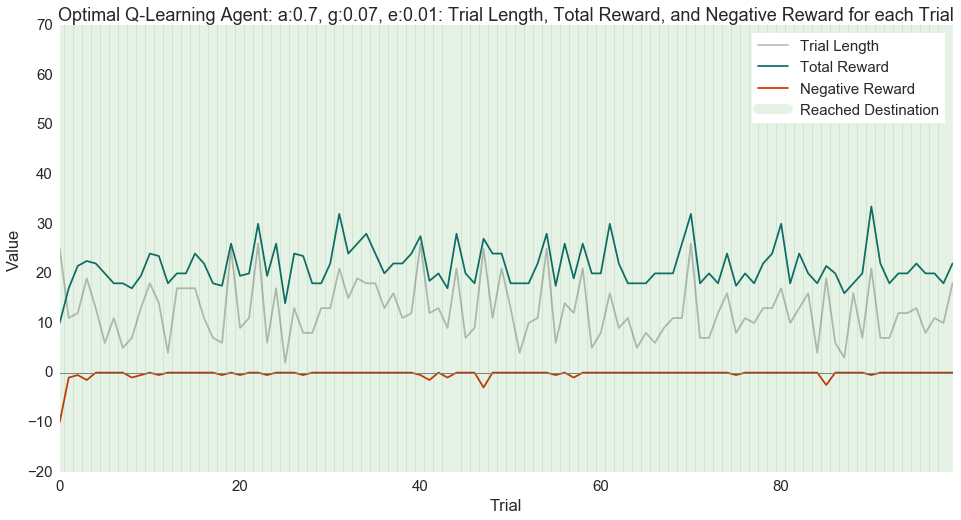

In [9]:
sp.display_optimal_simulation()

The Q-Learning agent with these parameters performed remarkably well. It reached the destination in every single trial and apperas to have reached reasonably optimal values of Q(s,a) in only 3 trials. It didn't incur any negative rewards after the 90th trial (though, to some extent, this is down to chance). It is interesting to compare the summary statistics for this simulation and that of the Informed Driver simulation. The mean total reward per trial is only slightly less for the Q-Learning agent even though the Q-Learning agent has no prior knowledge of the 'rules of the road'. This very clearly illustrates the power of Q-learning to find the optimal policy given enough experince with the sate, action, reward loop for the most frequently encountered states.

For the sake of comparison, it will be interesting to compare this performance to the agents using the extreme parameter values (where α, γ, and ε are all set to 0.01 or 0.7) and the simulation the received the lowest fitness score.

This agent received a fitness score of 61.5926390402.
The destination was reached in 74 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,18.14,8.387424,-1.5,14.375,20,24.00,32
negative_reward,100,-0.44,1.439486,-13.0,-0.500,0,0.00,0
trial_length,100,17.81,10.769106,4.0,9.750,14,21.25,46


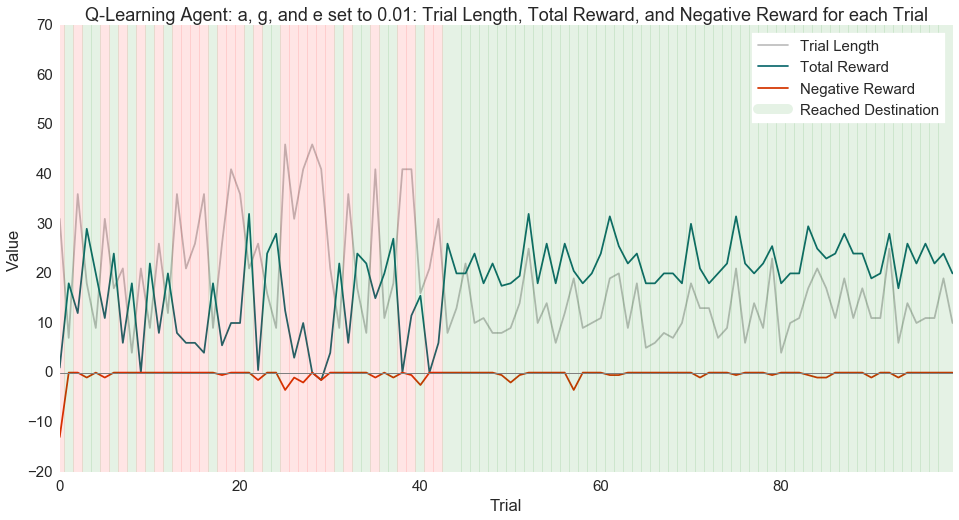

In [10]:
sp.display_stats_for_the_q_learning_agent_with_params(0.01)

This agent received a fitness score of 28.7944652619.
The destination was reached in 81 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,22.315,10.960594,-11.5,17.375,22.0,26.625,54
negative_reward,100,-3.930,3.769240,-19.5,-5.000,-2.5,-1.500,0
trial_length,100,18.640,10.861404,2.0,10.000,17.0,26.000,47


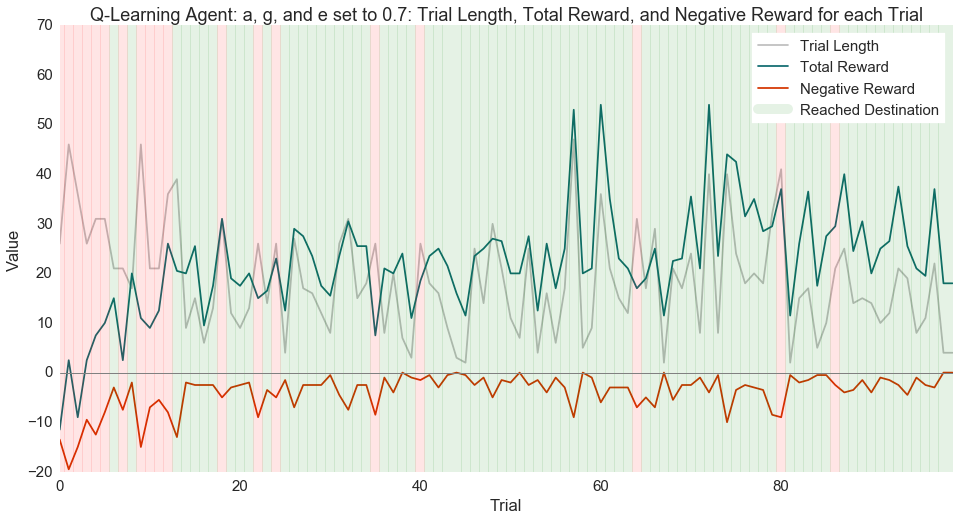

In [11]:
sp.display_stats_for_the_q_learning_agent_with_params(0.7)

The least optimal parameters are: {'alpha': 0.3, 'gamma': 0.7, 'epsilon': 0.7}
This agent received a fitness score of 23.1592827147.
The destination was reached in 77 out of 100 trials.


,count,mean,std,min,25%,50%,75%,max
total_reward,100,22.335,10.604234,-1,15.875,21.5,29.125,56
negative_reward,100,-4.175,3.672430,-16,-5.500,-3.5,-1.500,0
trial_length,100,19.090,9.827908,4,11.000,20.0,26.000,46


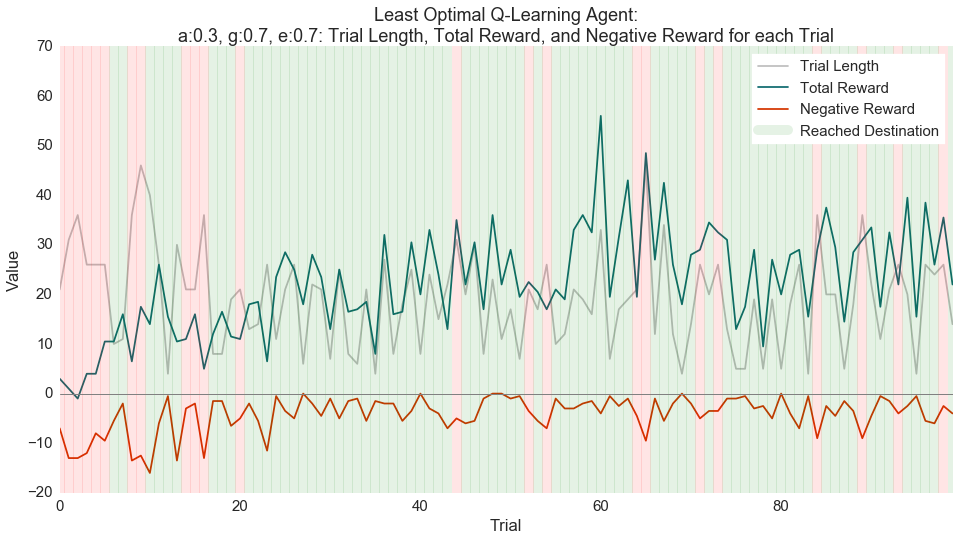

In [12]:
sp.display_least_optimal_simulation()

When the Q-Learning agent operates with very small values for α, γ, and ε (0.01), the agent does eventually learn the optimal policy though, for the 1 simulation using these parameter values, it took 42 trials to get there. After the 42nd trial this agent always reached the destination and incurred negative rewards very infrequently (as ε was so small). Though this may still be impressive, it took the agent 7 times longer to learn the policy than it did with the optiaml parmeter values.

When the Q-Learning agent operates with very large values for α, γ, and ε (0.7), the agent performs far worse than either withs amll values or the optimal values. The large ε value means the agent incurs negative rewards throughout the 100 trials with very few exceptions. Even though the perfomance did improve after the 14th trial, it still failed to reach the destination in the 80th and 86th trials.

It is interesting to find that it is neither when all of the paramters are equally small or equally large that results in the worst performance.

#### QUESTION: Does your agent get close to finding an optimal policy, i.e. reach the destination in the minimum possible time, and not incur any penalties? How would you describe an optimal policy for this problem?

I think the Q-Learning agent with an α of 0.7, γ of 0.07, and ε of 0.01 does find an optimal policy. It reached the destination in all trials amd it avoided incurring a negative reward for the final 9 trials, but I think we can go a step further in this analysis. I believe the optimal policy is the one used by the Informed Driver Agent. The policy used by that agent minimises the trial length and negative rewards while maximising the total reward (for a detailed description of the policy, please see the appropriate section higher up in this report). More specifically, the Informed Driver policy follows the following rules:

- When the desired direction is 'forward':
    - And the traffic light is 'green': return 'forward' (Case 1)
    - Else: return 'None' (Case 2)
- When the desired direction is 'left':
    - And the traffic light is 'green' AND if there is oncoming traffic, it is travelling 'left': return 'left' (Case 3)
    - Else: return 'None' (Case 4)
- When the desired direction is 'right':
    - And the traffic light is 'green' OR the traffic on the left is NOT travelling 'forward': return 'right' (Case 5)
    - Else: return 'None' (Case 6)


By examining the Q and N matrices built up during the simulation of the optiaml Q-Learning agent, we can see if the agent found the optimal policy.

In [14]:
sp.optimal_q_and_n_less_empty_rows()

State encoding:
    tl: Traffic light
    o:  Oncoming traffic
    r:  Traffic coming from the right
    l:  Traffic coming from the left
    dd: Desired direction
NB: Please note that states that were not experienced by the agent are not displayed.

Q(s,a):


,State,forward,right,left,None
93,tl:green_o:right_r:None_l:None_dd:forward,1.923,0.000,0.000,0.000
141,tl:green_o:left_r:None_l:None_dd:forward,1.945,0.000,0.000,0.000
153,tl:green_o:None_r:forward_l:None_dd:forward,1.406,-0.345,0.000,0.000
154,tl:green_o:None_r:forward_l:None_dd:right,-0.255,0.000,0.000,0.000
155,tl:green_o:None_r:forward_l:None_dd:left,-0.350,0.000,0.000,0.000
165,tl:green_o:None_r:right_l:None_dd:forward,1.500,0.000,0.000,0.000
166,tl:green_o:None_r:right_l:None_dd:right,-0.252,0.000,0.000,0.000
177,tl:green_o:None_r:left_l:None_dd:forward,1.855,0.000,-0.250,0.000
178,tl:green_o:None_r:left_l:None_dd:right,0.000,1.504,-0.250,0.000
180,tl:green_o:None_r:None_l:forward_dd:forward,2.059,0.000,0.000,0.000


N(s,a):


,State,forward,right,left,None
93,tl:green_o:right_r:None_l:None_dd:forward,2,0,0,0
141,tl:green_o:left_r:None_l:None_dd:forward,2,0,0,0
153,tl:green_o:None_r:forward_l:None_dd:forward,1,1,0,0
154,tl:green_o:None_r:forward_l:None_dd:right,1,0,0,0
155,tl:green_o:None_r:forward_l:None_dd:left,1,0,0,0
165,tl:green_o:None_r:right_l:None_dd:forward,1,0,0,0
166,tl:green_o:None_r:right_l:None_dd:right,1,0,0,0
177,tl:green_o:None_r:left_l:None_dd:forward,2,0,1,0
178,tl:green_o:None_r:left_l:None_dd:right,0,1,1,0
180,tl:green_o:None_r:None_l:forward_dd:forward,3,0,0,0


**Case 1**: (rows 93, 141, 153, 165, 177, 180, 183, 186, 189)

In all of these rows, except row 183, the largest Q(s,a) value was for the optimal action. Row 189 represents the state where the traffic light is 'green' and the desired direction is 'forward' without any other traffic at the intersection. This is the most commonly experineced state (by a very large margin) for this case and the optimal action was returned for 301 out of 301 trial steps.

**Case 2**: (rows 237, 333, 369, 372, 378, 381)

Row 381 represents the state where the traffic light is 'red' and the desired direction is 'forward' without any other traffic at the intersection. This is the most commonly experineced state (by a very large margin) for this case and the optimal action was returned for 513 out of 520 trial steps.

**Case 3**: (rows 155, 185, 191)

Row 191 represents the state where the traffic light is 'green' and the desired direction is 'left' without any other traffic at the intersection. This is the most commonly experineced state (by a very large margin) for this case and the optimal action was returned for 58 out of 61 trial steps.

**Case 4**: (rows 374, 383)

Row 383 represents the state where the traffic light is 'red' and the desired direction is 'left' without any other traffic at the intersection. This is the most commonly experineced state (by a very large margin) for this case and the optimal action was returned for 108 out of 111 trial steps.

**Case 5**: (rows 154, 166, 178, 187, 190, 238, 382)

Row 190 represents the state where the traffic light is 'green' and the desired direction is 'right' without any other traffic at the intersection where row 382 represents the same state except the traffic light is 'red'. The optimal action was returned for 53 out of 57 trial steps when the traffic light was 'green' and 56 out of 60 trial steps when the traffic light was 'red'.

**Case 6**: This case was never experienced by the agent.


None of the states experineced have a Q(s,a) value for all four actions.

Upon closely analysing the values within Q(s,a) and N(s,a) matrices, I don't think it would be correct to claim that the Q-Learning agent with an α of 0.7, γ of 0.07, and ε of 0.01 learned the optimal policy in its entirety. This is not an indication that the parameters are not indeed optimal or that the agent performed badly, but is instead an indication of how sprasely the agent experinced the state space when the environment only contains 3 other agents and a simulation is made up of only 100 trials. Too many of the states were only experinced a handful of times or not at all. The one state that comprises case 6 in the optimal policy description was never experienced.

If we step away from analysing the whole state space and instead focus on the 5 states that represent the the state of the agent in a very large majority of trial steps (the sum of N(s,a) for these 5 states out number all other states by 2 orders of magnitude), then the optimal policy was learned. In all 5 of these states, the optimal action is returned.

## Conclusion

This project very clearly illustrates just how powerful Q-Learning can be for agents operating in environemnts with well defined state-action-reward cycles. This is especially true if the state space is explored enough to populate the Q(s,a) matrix for the most often experienced states.

### Resources

The production of this project was aided by information found on the following websites (various authors and contributors)

- [Udacity.com](udacity.com)
- [StackOverflow.com](stackoverflow.com)
- [Seaborn Documentation](stanford.edu/~mwaskom/software/seaborn/index.html)

The following book was also referenced:

Russell, S., and P. Norvig. "Reinforcement Learning." In Artificial Intelligence: A Modern Approach. S.l.: Pearson Education Limited, 2010.